## POSTTEST 6 

### Nama : Novitasari Malisan

### NIM : 2109106133

### Kelas : Informatika C2'21

## IMPORT LIBRARY

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

### Membaca Dataset

In [106]:
df = pd.read_csv('AirlinePassengerSatisfaction.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


### Memisahkan Fitur dan Target

In [107]:
X = df.drop('satisfaction', axis=1) 
y = df['satisfaction']

### Menggunakan label encoding untuk mengubah variabel target "satisfaction" menjadi 1 dan 0

In [108]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

### Split dataset menjadi train dan test

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Memisahkan kolom-kolom numerik dan kategorikal

In [110]:
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

### Menggunakan OneHotEncoder dengan handle_unknown='ignore' pada kolom kategorikal

In [111]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

### Mengkodekan kolom data kategorikal pada X_train dan X_test

In [112]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

### Mengonversi seluruh dataset (fitur dan target) ke float32

In [113]:
X_train[numeric_cols] = X_train[numeric_cols].astype('float32')
X_test[numeric_cols] = X_test[numeric_cols].astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

### Membuat Sequential model

In [141]:
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                640       
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Mengompilasi Model

In [142]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [143]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.84 and logs.get('val_accuracy') > 0.84):
            self.model.stop_training = True

### Melatih Model

In [144]:
kolbek = MyCallback()
history = model.fit(
        X_train_encoded, 
        y_train, 
        epochs=10, 
        batch_size=64, 
        validation_data=(X_test_encoded, y_test),
        callbacks=[kolbek]
    )

Epoch 1/10
325/325 [==============================] - 3s 6ms/step - loss: 0.5081 - accuracy: 0.7711 - val_loss: 0.4792 - val_accuracy: 0.7808
Epoch 2/10
325/325 [==============================] - 5s 14ms/step - loss: 0.4885 - accuracy: 0.7781 - val_loss: 0.4796 - val_accuracy: 0.7800
Epoch 3/10
325/325 [==============================] - 3s 11ms/step - loss: 0.4886 - accuracy: 0.7756 - val_loss: 0.4810 - val_accuracy: 0.7808
Epoch 4/10
325/325 [==============================] - 6s 18ms/step - loss: 0.4885 - accuracy: 0.7774 - val_loss: 0.4800 - val_accuracy: 0.7829
Epoch 5/10
325/325 [==============================] - 4s 12ms/step - loss: 0.4885 - accuracy: 0.7767 - val_loss: 0.4793 - val_accuracy: 0.7808
Epoch 6/10
325/325 [==============================] - 2s 7ms/step - loss: 0.4884 - accuracy: 0.7779 - val_loss: 0.4792 - val_accuracy: 0.7798
Epoch 7/10
325/325 [==============================] - 2s 5ms/step - loss: 0.4882 - accuracy: 0.7771 - val_loss: 0.4806 - val_accuracy: 0.7775
Ep

### Evaluasi Model

In [145]:
score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

163/163 [==============================] - 1s 4ms/step - loss: 0.4813 - accuracy: 0.7808
Test loss: 0.4812808930873871
Test accuracy: 0.7807928919792175


### Menampilkan grafik model loss dan model accuracy, baik pada training maupun validation

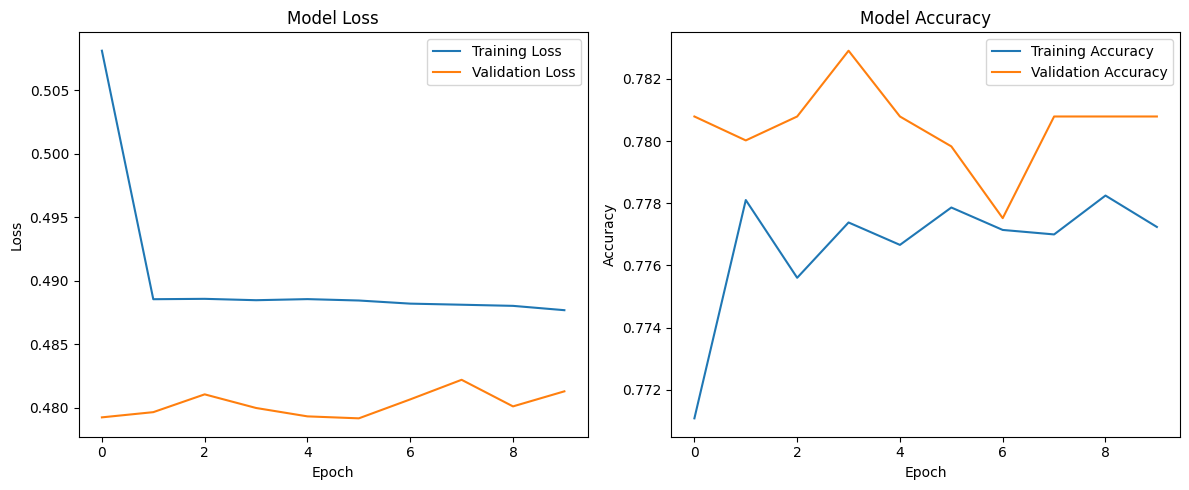

In [146]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()